# Classification Algorithms
To discover which algorithm works best on the dataset, use trial-and-error on a short-list of candidate algorithms.

In [1]:
import pandas
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

/usr/lib/python3/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# these examples use the Pima Indian diabetes dataset
url = "pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values

In [3]:
# separate array into features (X) and label (y) parts
X = array[:,0:8]
y = array[:,8]

## Linear Algorithms

### Logistic Regression
Only suitable for binary classification and assumes a Gaussian distribution for numeric input variables.

In [4]:
num_folds = 10
num_instances = len(X)
seed = 8

kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
model = LogisticRegression()

results = cross_validation.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7695146958304853


### Linear Discriminant Analysis (LDA)
Suitable for binary and multiclass classification, and also assumes a Gaussian distribution for numeric input variables.

In [5]:
num_folds = 10
num_instances = len(X)
seed = 8

kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
model = LinearDiscriminantAnalysis()

results = cross_validation.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.773462064251538


## Nonlinear Algorithms

### K-Nearest Neighbors (KNN)
Uses a distance metric to find the K most similar instances in the training data for a new (unseen) instance and takes the mean y-label of those neighbours as the predicted y-label for the new instance.

In [6]:
num_folds = 10
num_instances = len(X)
random_state = 8

kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=random_state)
model = KNeighborsClassifier()

results = cross_validation.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7265550239234451


### Naive Bayes
Calculates the probability of each class and the conditional probability of each class given each input value. Probabilities are estimated for new data and multiplied together, assuming all are independent (a naive assumption). A Gaussian distribution is assumed. See: http://www.statsoft.com/textbook/naive-bayes-classifier

In [7]:
num_folds = 10
num_instances = len(X)
seed = 8

kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
model = GaussianNB()

results = cross_validation.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7551777170198223


### Classification and Regression Trees (CART)
Simply "decision trees". Constructs a binary tree from the training data and split points are chosen greedily by evaluating each input variable and value in order to minimise a cost function.

In [8]:
num_folds = 10
num_instances = len(X)
seed = 8

kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
model = DecisionTreeClassifier()

results = cross_validation.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7017600820232399


### Support Vector Machines (SVM)
Seek a line that best separates two classes. Instances closest to the line that best separates the classes are called support vectors and influence where the line is placed. SVM can support multiple classes.

In [9]:
num_folds = 10
num_instances = len(X)
seed = 8

kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
model = SVC()

results = cross_validation.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.6510252904989747


## Compare Algorithms

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.688790 (0.059964)
NB: 0.755178 (0.042766)
SVM: 0.651025 (0.072141)


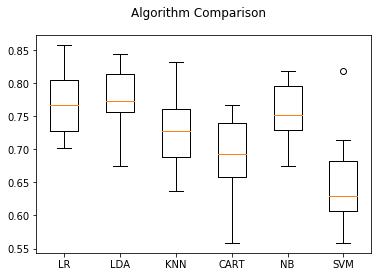

In [10]:
# prepare configuration for cross validation test
num_folds = 10
num_instances = len(X)
seed = 8

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Based on these results, logistic regression (LR) and linear discriminant analysis (LDA) are the top performers.